In [158]:
import pandas as pd

读取出租车数据

In [159]:
df = pd.read_csv("data/重庆充电站位置数据.csv")

In [160]:
df

,id,充电站名称,地址,省,市,区,纬度,经度
0,1,特来电充电站(森迪大道),重庆市九龙坡区西彭镇森迪大道随缘石化加油站内,重庆市,重庆市,九龙坡区,29.329217,106.317934
1,2,特来电充电站(西部新城),重庆市沙坪坝区虎溪街道盛德路1号大学城西部客运站,重庆市,重庆市,沙坪坝区,29.620435,106.329908
2,3,国家电网充电站(重庆市九龙坡区巴福镇赵大路),重庆市九龙坡区巴福镇赵大路九龙园C区,重庆市,重庆市,九龙坡区,29.409713,106.353097
3,4,国家电网充电站(井熙路),重庆市沙坪坝区井口街道井熙路8号附3号,重庆市,重庆市,沙坪坝区,29.655390,106.452904
4,5,万马爱充充电站(中豪公园),重庆市大渡口区双城路163号兄弟装饰旁,重庆市,重庆市,大渡口区,29.496990,106.471445
...,...,...,...,...,...,...,...,...
418,419,星星充电站(重庆巴南木洞服务区),重庆市巴南区木洞收费站木洞镇南涪路木洞收费站,重庆市,重庆市,巴南区,29.594835,106.889956
419,420,普科特电动汽车充电站(华南城站),重庆市巴南区东城大道南段重庆理工职业学院西南侧约190米,重庆市,重庆市,巴南区,29.356809,106.615396
420,421,国家电网充电站(重庆市南岸区鹿角供...,重庆市巴南区迎宾路306-1号,重庆市,重庆市,巴南区,29.448363,106.622828
421,422,电动车集中充电处,重庆市巴南区万泉街重庆大江技工学校南侧约190米,重庆市,重庆市,巴南区,29.389394,106.514001


数据可视化

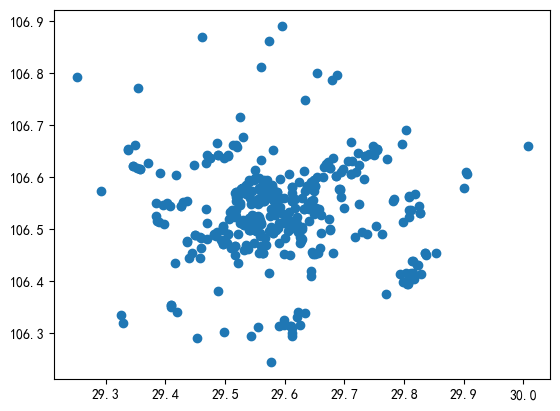

In [161]:
import matplotlib.pyplot as plt
plt.scatter(df["纬度"], df["经度"])

借助DBSCAN聚类取出离群点数据， label值为-1表示该点为离群点

In [162]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(0.03, min_samples=8)
model_dbscan.fit(df[["纬度","经度"]])
model_dbscan.labels_

array([-1,  0, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  2,  1,  1,  1, -1,  5,  5,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  3,  1, -1,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  5,  1, -1,  1,  1,  1,  1,  3,  1,  0,  1,  1,
        3, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  3,  1,  1,  1, -1,  1,  1,  1,  3,  1,  1,  1,  3,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  3,  1,
        1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1

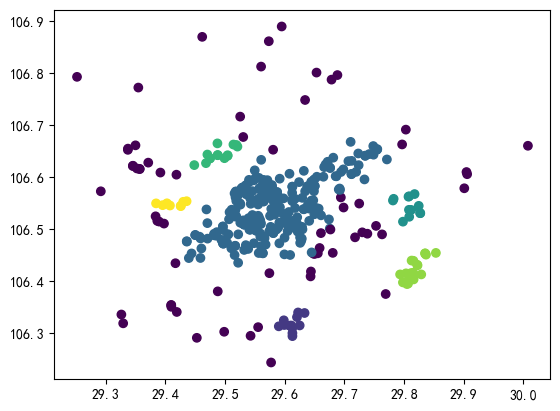

In [163]:
import matplotlib.pyplot as plt
plt.scatter(df["纬度"], df["经度"], c=model_dbscan.labels_)

为原始数据增加label列，拼接上他们的类别id

In [164]:
df["label"] = model_dbscan.labels_

In [165]:
groups = df.groupby("label")

# 计算每个簇的中心点

In [166]:
centers = df.groupby("label").agg({"纬度":"mean", "经度":"mean"})
# 删除离群点
centers.drop(-1,inplace=True)
centers

,纬度,经度
label,,
0,29.612154,106.316626
1,29.582041,106.540607
2,29.808463,106.543246
3,29.489944,106.643864
4,29.816415,106.420448
5,29.413314,106.547795


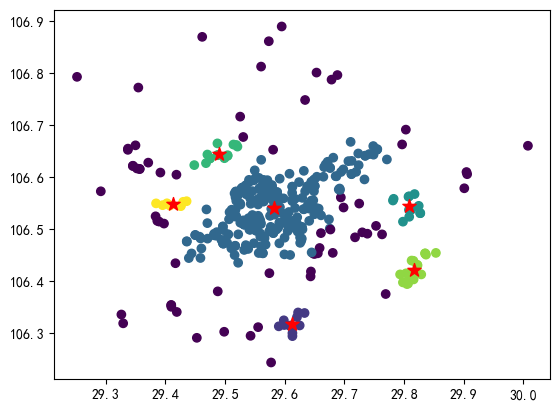

In [167]:
plt.scatter(df["纬度"], df["经度"], c=model_dbscan.labels_)
plt.scatter(centers["纬度"], centers["经度"], c = "r", marker="*", s = 100)